<a href="https://colab.research.google.com/github/Sammodi0711/NLP-Sem-1/blob/main/S25MCAG0019_NLP_lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# #1. Task 1: Preprocessing the Data
# •	Download any medium-sized text corpus (e.g., Wikipedia dump, news articles, or movie reviews dataset).
# •	Perform preprocessing:
# o	Lowercasing
# o	Removing punctuation and stopwords
# o	Tokenization
# •	Print the size of the vocabulary and the first 20 tokens


import nltk
from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
import string
import textwrap

nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

texts = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
text = " ".join(texts)

text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))

tokens = word_tokenize(text)
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]

vocab = set(tokens)
print(f"Vocabulary size: {len(vocab)}")

first_20 = list(vocab)[:20]
wrapped_output = textwrap.fill(" ".join(first_20), width=50)
print("First 20 tokens:\n", wrapped_output)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary size: 47420
First 20 tokens:
 disastorous front cowardly independentminded
americanchinese dreyfuss chatham pistols tarsem
twentytwo introd kite flynt brushstrokes doffs
aspired vicars endowing wield mains


In [ ]:
# #2.Task 2: Training Word2Vec from Scratch (20 marks)
# •	Train a CBOW model using Gensim or PyTorch/TensorFlow.
# •	Train a Skip-Gram model on the same corpus.
# •	Report:
# o	Vocabulary size
# o	Embedding dimension
# o	Training time for both models


!pip install gensim
import nltk
from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
import time

nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

texts = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
text = " ".join(texts)
text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))
tokens = word_tokenize(text)
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]

sentences = [word_tokenize(movie_reviews.raw(fileid).lower().translate(str.maketrans('', '', string.punctuation)))
             for fileid in movie_reviews.fileids()]
sentences = [[token for token in sent if token not in stop_words] for sent in sentences]

embedding_dim = 100

start_time = time.time()
cbow_model = Word2Vec(sentences=sentences, vector_size=embedding_dim, window=5, min_count=2, sg=0)
cbow_time = time.time() - start_time

start_time = time.time()
skipgram_model = Word2Vec(sentences=sentences, vector_size=embedding_dim, window=5, min_count=2, sg=1)
skipgram_time = time.time() - start_time

vocab_size = len(cbow_model.wv.index_to_key)

print(f"Vocabulary size: {vocab_size}")
print(f"Embedding dimension: {embedding_dim}")
print(f"CBOW training time: {cbow_time:.2f} seconds")
print(f"Skip-Gram training time: {skipgram_time:.2f} seconds")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary size: 27551
Embedding dimension: 100
CBOW training time: 9.87 seconds
Skip-Gram training time: 28.61 seconds


In [ ]:
# Task 3: Exploring Word Embeddings (20 marks)
# •	Write code to:
# o	Find the top 10 most similar words to a given input word (e.g., "king", "education", "football").
# o	Solve analogy problems using embeddings:
# 	king – man + woman = ?
# 	paris – france + italy = ?
# o	Print cosine similarity scores.


from gensim.models import Word2Vec

input_words = ["king", "education", "football"]

print("Top 10 most similar words:")
for word in input_words:
    if word in cbow_model.wv:
        similar_words = cbow_model.wv.most_similar(word, topn=10)
        print(f"\nWord: {word}")
        for sim_word, score in similar_words:
            print(f"{sim_word}: {score:.4f}")
    else:
        print(f"\nWord '{word}' not in vocabulary.")

analogies = [
    ("king", "man", "woman"),
    ("paris", "france", "italy")
]

print("\nAnalogy Results:")
for a, b, c in analogies:
    if all(word in cbow_model.wv for word in [a, b, c]):
        result = cbow_model.wv.most_similar(positive=[a, c], negative=[b], topn=1)
        word, score = result[0]
        print(f"{a} - {b} + {c} = {word} (Cosine similarity: {score:.4f})")
    else:
        print(f"Analogy '{a} - {b} + {c}' cannot be computed; word not in vocabulary.")

Top 10 most similar words:

Word: king
british: 0.9986
dan: 0.9983
investigator: 0.9983
eric: 0.9982
l: 0.9981
w: 0.9981
richardson: 0.9980
former: 0.9978
susan: 0.9978
guard: 0.9977

Word: education
drive: 0.9974
free: 0.9970
trip: 0.9966
killing: 0.9966
happiness: 0.9962
discover: 0.9962
survive: 0.9960
phone: 0.9959
convince: 0.9957
dreams: 0.9955

Word: football
bobby: 0.9978
joins: 0.9977
led: 0.9976
student: 0.9975
german: 0.9974
counselor: 0.9974
reporter: 0.9974
teams: 0.9974
attorney: 0.9973
professor: 0.9973

Analogy Results:
king - man + woman = including (Cosine similarity: 0.9847)
paris - france + italy = official (Cosine similarity: 0.9968)


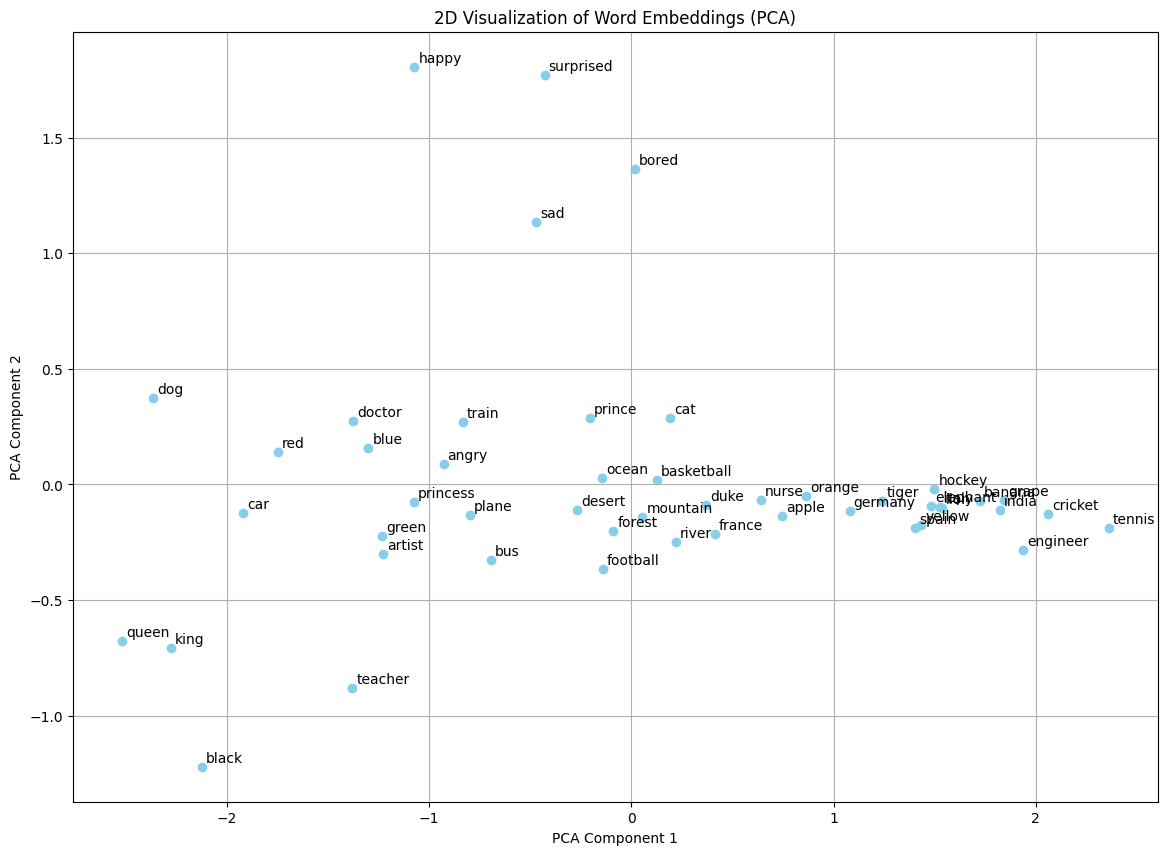

In [ ]:
# #4.Task 4: Visualizing Embeddings (15 marks)
# •	Select 50 words from different categories (e.g., fruits, animals, countries, professions).
# •	Reduce embeddings to 2D using PCA or t-SNE.
# •	Plot a scatterplot with words annotated.
# •	Comment on whether similar words form clusters.


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = [
    "apple", "banana", "orange", "grape", "mango",
    "cat", "dog", "lion", "tiger", "elephant",
    "france", "germany", "italy", "spain", "india",
    "doctor", "engineer", "teacher", "nurse", "artist",
    "football", "basketball", "cricket", "tennis", "hockey",
    "red", "blue", "green", "yellow", "black",
    "car", "bus", "train", "bicycle", "plane",
    "happy", "sad", "angry", "surprised", "bored",
    "king", "queen", "prince", "princess", "duke",
    "river", "mountain", "ocean", "forest", "desert"
]

words_in_vocab = [w for w in words if w in cbow_model.wv]
embeddings = [cbow_model.wv[w] for w in words_in_vocab]

pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(14, 10))
plt.scatter(emb_2d[:,0], emb_2d[:,1], color='skyblue')

for i, word in enumerate(words_in_vocab):
    plt.annotate(word, (emb_2d[i,0]+0.02, emb_2d[i,1]+0.02))

plt.title("2D Visualization of Word Embeddings (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [ ]:
# #5.Task 5: Using Pretrained Word2Vec (15 marks)
# •	Load Google’s pretrained Word2Vec embeddings (GoogleNews-vectors) or any available pretrained embeddings in your chosen language.
# •	Compare similarity results with your trained model.


!pip install gensim

import gensim.downloader as api
from gensim.models import Word2Vec, KeyedVectors

google_model = api.load('word2vec-google-news-300')

words = ["king", "education", "football"]

print("=== Top 5 Similar Words Comparison ===\n")
for word in words:
    print(f"Word: {word}")

    if word in cbow_model.wv:
        print("Custom CBOW Model:")
        for sim_word, score in cbow_model.wv.most_similar(word, topn=5):
            print(f"{sim_word}: {score:.4f}")
    else:
        print("Custom CBOW Model: word not in vocabulary")

    if word in google_model:
        print("Google News Pretrained Model:")
        for sim_word, score in google_model.most_similar(word, topn=5):
            print(f"{sim_word}: {score:.4f}")
    else:
        print("Google News Model: word not in vocabulary")

    print("\n")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
=== Top 5 Similar Words Comparison ===

Word: king
Custom CBOW Model:
british: 0.9986
dan: 0.9983
investigator: 0.9983
eric: 0.9982
l: 0.9981
Google News Pretrained Model:
kings: 0.7138
queen: 0.6511
monarch: 0.6413
crown_prince: 0.6204
prince: 0.6160


Word: education
Custom CBOW Model:
drive: 0.9974
free: 0.9970
trip: 0.9966
killing: 0.9966
happiness: 0.9962
Google News Pretrained Model:
eduction: 0.7980
eduation: 0.7176
LISA_MICHALS_covers: 0.6817
Matt_Krupnick_covers: 0.6798
educational: 0.6780


Word: football
Custom CBOW Model:
bobby: 0.9978
joins: 0.9977
led: 0.9976
student: 0.9975
german: 0.9974
Google News Pretrained Model:
soccer: 0.7314
fooball: 0.7140
Football: 0.7125
basketball: 0.6682
footbal: 0.6649


